In [19]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data from library
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Data size
train_images.shape

(60000, 28, 28)

In [4]:
# Data labels - some instances
train_labels[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
# Uniqueness of Labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Number: 5


<function matplotlib.pyplot.show(close=None, block=None)>

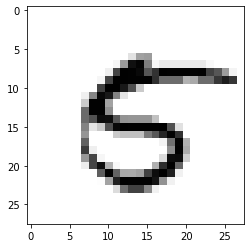

In [6]:
# Display image
chosen_idx = 50800
chosen_image = train_images[chosen_idx]

# Display result
print("Number:", train_labels[chosen_idx])
plt.imshow(chosen_image, cmap='binary')
plt.show

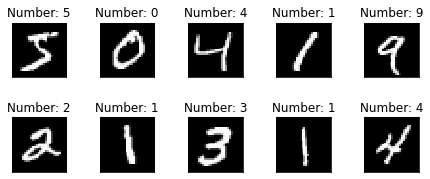

In [7]:
# Display multiple images
for img_indx in range(10):
  plt.subplot(3, 5, img_indx+1)
  plt.tight_layout()  # Tight display

  # Image show
  plt.imshow(train_images[img_indx], cmap='gray', interpolation='None')
  plt.title('Number: {}'.format(train_labels[img_indx]))
  plt.xticks([])
  plt.yticks([])

In [8]:
from keras.models import Sequential
from keras.layers import Dense

# Create sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Process the array of pixels - The train
train_images = train_images.reshape(60000, -1, 1)   # Reshaping
train_images = train_images.astype('float32')/255   # Rescaling

# Process the array of pixels - The test
test_images = test_images.reshape(10000, -1, 1)   # Reshaping
test_images = test_images.astype('float32')/255   # Rescaling

In [10]:
from keras.utils import to_categorical

# One-hot encoding - train set
one_hot_train = to_categorical(train_labels)

# Print one-hot encoding
one_hot_train.shape

(60000, 10)

In [11]:
one_hot_train[0, :]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
# One-hot encoding - test set
one_hot_test = to_categorical(test_labels)

# Print one-hot encoding
one_hot_test.shape

(10000, 10)

In [13]:
# Compile model and train
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, one_hot_train, epochs=10, batch_size=128)

# Test set evaluation
test_loss, test_acc = model.evaluate(test_images, one_hot_test)
print('Test Loss:', test_loss)
print('Test Acc.:', test_acc)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2640 - accuracy: 0.9247
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1064 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0699 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0508 - accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0219 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0125 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.980

1/1 [==============================] - 0s 21ms/step
Predicted Number: 9


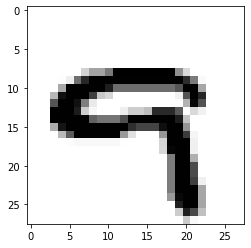

In [16]:
from random import randint

# Test image
chosen_test = randint(0, 10000)
chosen_img  = test_images[chosen_test, :, :].reshape(1, -1)
predict_num = np.argmax(model.predict(chosen_img))
plt.imshow(chosen_img.reshape(28, 28), cmap='binary')
print("Predicted Number:", predict_num)

In [17]:
from keras.models import load_model

# Save model
model.save('/content/model01_mnist.h5')

# Load model
trained_model01 = load_model('model01_mnist.h5')

Predicted number: 2


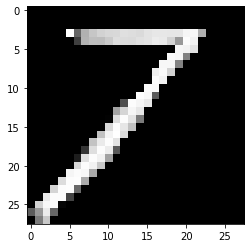

In [31]:
from keras.utils import load_img, img_to_array

# Test my own digits
file_path = '/content/Test_num1.png'
target_shape = (28, 28)

# Read image from file, convert to grayscale and display
user_img = load_img(file_path, target_size=target_shape, color_mode= "grayscale")
plt.imshow(user_img, cmap='gray')

# Image to array
user_img = img_to_array(user_img).astype('float32')
user_img = user_img/255   # Normalize

# Make prediction
pred_value = np.argmax(model.predict(user_img.reshape(1,-1), verbose=False))
print("Predicted number:", pred_value)

I suceeded in fooling my model!

Predicted number: 3


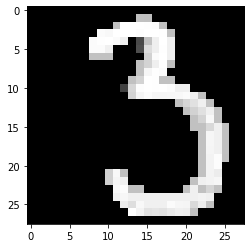

In [32]:
# Test my own digits
file_path = '/content/Test_num2.png'

# Read image from file, convert to grayscale and display
user_img = load_img(file_path, target_size=target_shape, color_mode= "grayscale")
plt.imshow(user_img, cmap='gray')

# Image to array
user_img = img_to_array(user_img).astype('float32')
user_img = user_img/255   # Normalize

# Make prediction
pred_value = np.argmax(model.predict(user_img.reshape(1,-1), verbose=False))
print("Predicted number:", pred_value)

Predicted number: 3


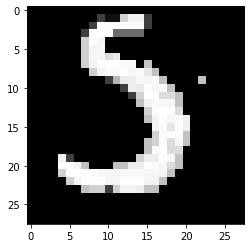

In [33]:
# Test my own digits
file_path = '/content/Test_num3.png'

# Read image from file, convert to grayscale and display
user_img = load_img(file_path, target_size=target_shape, color_mode= "grayscale")
plt.imshow(user_img, cmap='gray')

# Image to array
user_img = img_to_array(user_img).astype('float32')
user_img = user_img/255   # Normalize

# Make prediction
pred_value = np.argmax(model.predict(user_img.reshape(1,-1), verbose=False))
print("Predicted number:", pred_value)

Predicted number: 2


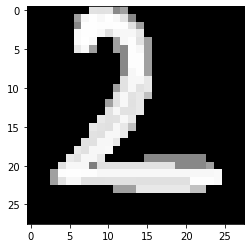

In [34]:
# Test my own digits
file_path = '/content/Test_num4.png'

# Read image from file, convert to grayscale and display
user_img = load_img(file_path, target_size=target_shape, color_mode= "grayscale")
plt.imshow(user_img, cmap='gray')

# Image to array
user_img = img_to_array(user_img).astype('float32')
user_img = user_img/255   # Normalize

# Make prediction
pred_value = np.argmax(model.predict(user_img.reshape(1,-1), verbose=False))
print("Predicted number:", pred_value)

Predicted number: 5


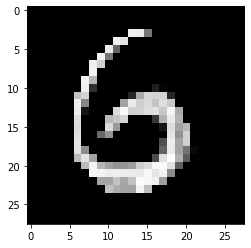

In [30]:
# Test my own digits
file_path = '/content/Test_num5.png'

# Read image from file, convert to grayscale and display
user_img = load_img(file_path, target_size=target_shape, color_mode= "grayscale")
plt.imshow(user_img, cmap='gray')

# Image to array
user_img = img_to_array(user_img).astype('float32')
user_img = user_img/255   # Normalize

# Make prediction
pred_value = np.argmax(model.predict(user_img.reshape(1,-1), verbose=False))
print("Predicted number:", pred_value)

Predicted number: 6


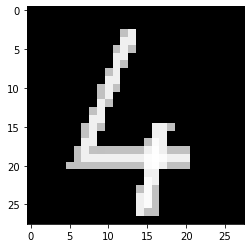

In [36]:
# Test my own digits
file_path = '/content/Test_num6.png'

# Read image from file, convert to grayscale and display
user_img = load_img(file_path, target_size=target_shape, color_mode= "grayscale")
plt.imshow(user_img, cmap='gray')

# Image to array
user_img = img_to_array(user_img).astype('float32')
user_img = user_img/255   # Normalize

# Make prediction
pred_value = np.argmax(model.predict(user_img.reshape(1,-1), verbose=False))
print("Predicted number:", pred_value)